In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy

In [2]:
#Importing Dataset using URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['Sepal-lenght','Sepal-Width','Petal-Length','Petal-Width','class']
dataset = pd.read_csv(url,names=names)

In [3]:
dataset.head()

,Sepal-lenght,Sepal-Width,Petal-Length,Petal-Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## DATASET SHAPE AND DESCRIPTION

In [5]:
print(dataset.shape)

(150, 5)


In [6]:
dataset.describe()

,Sepal-lenght,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


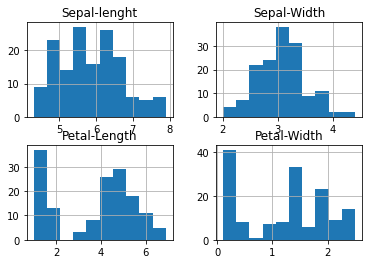

In [7]:
dataset.hist()
plt.show()

In [11]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [12]:
print(dataset.groupby('class').mean())

                 Sepal-lenght  Sepal-Width  Petal-Length  Petal-Width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


In [14]:
print(dataset.groupby('class').median())

                 Sepal-lenght  Sepal-Width  Petal-Length  Petal-Width
class                                                                
Iris-setosa               5.0          3.4          1.50          0.2
Iris-versicolor           5.9          2.8          4.35          1.3
Iris-virginica            6.5          3.0          5.55          2.0


## DATA VISUALIZATION 

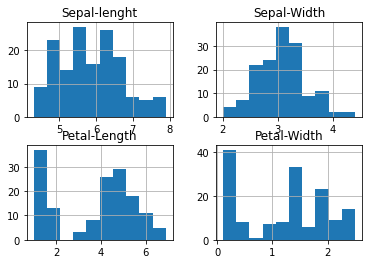

In [15]:
dataset.hist()
plt.show()

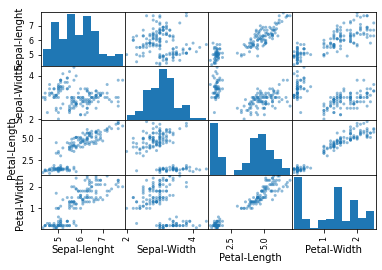

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

# Implementing Machine Learning Models on this dataset
### Three Different machine learning models are selected , evaluated on accuracy , F1 score , Precision and Recall.


In [21]:
from sklearn import model_selection
X = dataset.values[:,0:4]
Y = dataset.values[:,4]
Val_size = 0.30
seed = 92
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size=Val_size,random_state=seed)

In [24]:
ytrain

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris

### Implementing Cross Fold Validation (n=10)

In [46]:
evaluation_metric = 'accuracy'
seed = 92
Knumber = 10

In [38]:
#Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from 

In [47]:
ModelsList = []
ModelsList.append(('LR',LogisticRegression()))
ModelsList.append(('KNN',KNeighborsClassifier()))
ModelsList.append(('SVM',SVC()))

ResultsList = []
names = []

for name,model in ModelsList:
    kfold = model_selection.KFold(n_splits=Knumber, random_state = seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=evaluation_metric)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.990909 (0.027273)
KNN: 0.981818 (0.054545)
SVM: 0.981818 (0.054545)


### Making Predictions using the Models Created

In [50]:
# Importing Metric Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
for name, model in ModelsList:
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    print(name)
    print(accuracy_score(ytest,pred))
    print(classification_report(ytest,pred))

LR
0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

KNN
0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.85      0.85        13
 Iris-virginica       0.87      0.87      0.87        15

       accuracy                           0.91        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.91      0.91      0.91        45

SVM
0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicol